In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока)

In [4]:
def mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [5]:
def std(X):
    X = (X - X.mean()) / X.std()
    return X

In [6]:
def normalize(X):
    X = (X - X.min()) / (X.max() - X.min())
    return X

In [7]:
def ridge_regr(X, y, iters, alpha, lambda_):
    
    w = np.array([10, 0.1, 0.1, 0.1])
    weights = w.copy()
    n = X.shape[1]
    for i in range(1, iters+1):
        y_pred = np.dot(X.T, w)
        w -= alpha * (2/n * np.dot(X, (y_pred - y)) + lambda_ * w)
        if i % 100 == 0:
            weights = np.vstack((weights, w))
            
    return weights
    

In [8]:
X_std = X.copy()
X_std = X_std.astype(float)    

In [9]:
for i in range(1, X_std.shape[0]):
    X_std[i] = std(X[i])
X_std

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

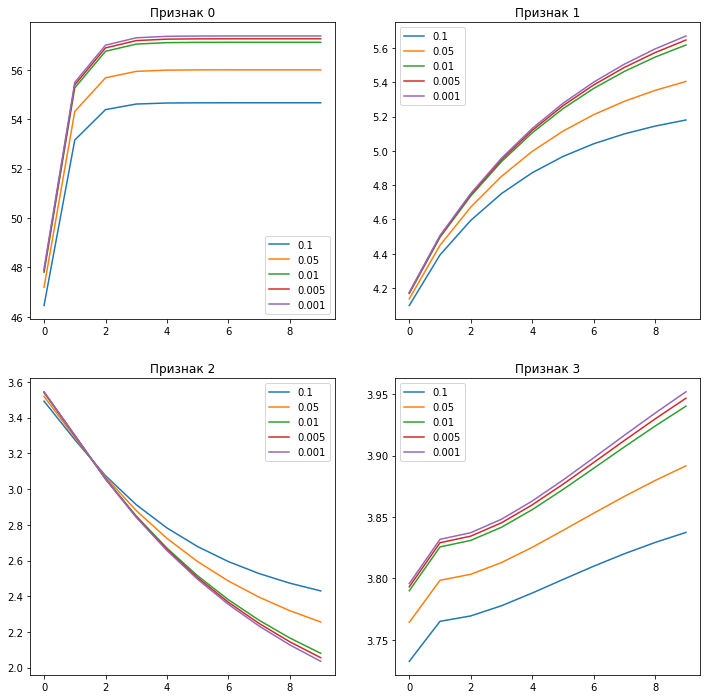

In [14]:
lambdas = [0.1, 0.05, 0.01, 0.005, 0.001]
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(12, 12)

for lambda_ in lambdas:
    weights = ridge_regr(X_std, y, 1000, 0.008, lambda_)
        
    for ind, axes in enumerate(ax.flatten()):
        axes.plot(weights[1:, ind])     
        axes.set_title(f'Признак {ind}')   
        axes.legend(lambdas)

plt.show()

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [66]:
X_nrm = X.copy()
X_nrm = X_nrm.astype(float)  
for i in range(1, X_nrm.shape[0]):
    X_nrm[i] = normalize(X[i])
#X_nrm

В переменных X_nrm и X_std мы имеем нормализованную и стандартизированные матрицы соответственно. Попробуем стандартизиовать нормализованную матрицу, и наоборот.

In [67]:
# в имени переменной последовательно содержаться операции, проведенные над матрицами.
#Т.е. X_nrm_std - матрица Х сначала нормализована, потом стандартизирована
X_nrm_std = X_nrm.copy()
X_nrm_std[1] = std(X_nrm_std[1])
X_nrm_std[2] = std(X_nrm_std[2])

X_std_nrm = X_std.copy()
X_std_nrm[1] = normalize(X_std_nrm[1])
X_std_nrm[2] = normalize(X_std_nrm[2])

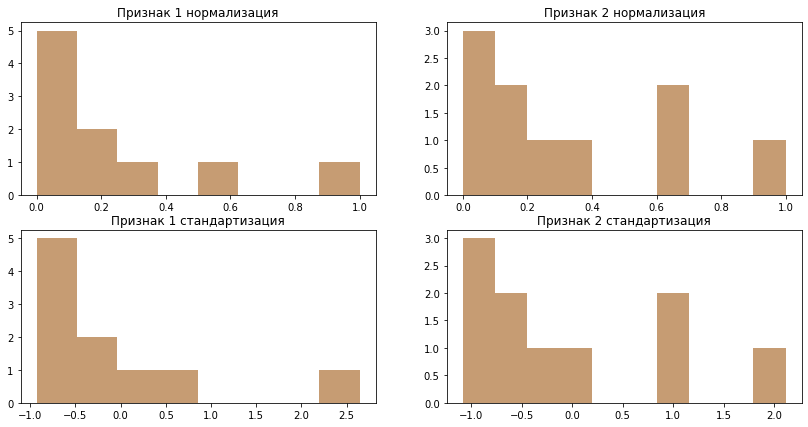

In [98]:
plt.figure(figsize=(14, 7))
ax1 = plt.subplot(2,2,1)
ax1.set_title('Признак 1 нормализация')
plt.hist(X_nrm[1], bins=8, alpha=0.5)
plt.hist(X_std_nrm[1], bins=8, alpha=0.5)
ax2 = plt.subplot(2,2,2)
ax2.set_title('Признак 2 нормализация')
plt.hist(X_nrm[2], bins=10, alpha=0.5)
plt.hist(X_std_nrm[2], bins=10, alpha=0.5)


ax3 = plt.subplot(2,2,3)
ax3.set_title('Признак 1 стандартизация')
plt.hist(X_std[1], bins=8, alpha=0.5)
plt.hist(X_nrm_std[1], bins=8, alpha=0.5)
ax4 = plt.subplot(2,2,4)
ax4.set_title('Признак 2 стандартизация')
plt.hist(X_std[2], bins=10, alpha=0.5)
plt.hist(X_nrm_std[2], bins=10, alpha=0.5)
plt.show()

plt.show()

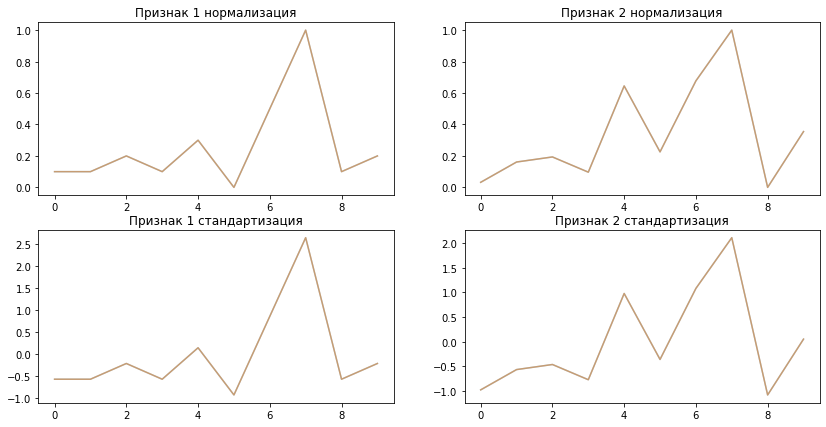

In [94]:
plt.figure(figsize=(14, 7))
ax1 = plt.subplot(2,2,1)
ax1.set_title('Признак 1 нормализация')
plt.plot(X_nrm[1], alpha=0.5)
plt.plot(X_std_nrm[1], alpha=0.5)
ax2 = plt.subplot(2,2,2)
ax2.set_title('Признак 2 нормализация')
plt.plot(X_nrm[2], alpha=0.5)
plt.plot(X_std_nrm[2], alpha=0.5)


ax3 = plt.subplot(2,2,3)
ax3.set_title('Признак 1 стандартизация')
plt.plot(X_std[1], alpha=0.5)
plt.plot(X_nrm_std[1], alpha=0.5)
ax4 = plt.subplot(2,2,4)
ax4.set_title('Признак 2 стандартизация')
plt.plot(X_std[2],  alpha=0.5)
plt.plot(X_nrm_std[2], alpha=0.5)
plt.show()

plt.show()

Мы видим, что графики нормализованного признака совпадает с нормальизованным признаком, который был предварительно стандартизирован. Аналогичное правило выполняется и в обратную сторону. То есть, по сути, определяющей является последняя процедура. <br>
<b> Следовательно, нет смысла применения обоих операций над одними данными. </b>

 ### 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

При L1-регуляризации мы используем вместо суммы квадратов весох их модули. Соответственно df/dw1 = d(|w1| + |w2| + |w3|) = w1/|w1|. Следовательно, w1 может быть -1, +1. В нуле будем считать значение равное нулю. Для этого нам подойдет функция np.sign(). При этом не забываем, что в lambda/2 

In [110]:
def lasso_regr(X, y, iters, alpha, lambda_):
    
    w = np.array([10, 0.1, 0.1, 0.1])
    n = X.shape[1]
    for i in range(1, iters+1):
        y_pred = np.dot(X.T, w)
        w -= alpha * (2/n * np.dot(X, (y_pred - y)) + lambda_/2 * np.sign(w))
    
    return w

In [111]:
lasso_regr(X_std, y, 1000, 0.001, 0.001)

array([50.9977254 ,  4.27939631,  3.49773795,  3.82024476])